In [1]:
import numpy as np
np.random.seed(3301)
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt

#Modelo
import sklearn
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#k fold validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

#Métricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
#CARGA DE DATOS YA PREPROCESADOS
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('data-HQ.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data.dropna()
display(data_t.sample(10))

,Unnamed: 0.1,Unnamed: 0,text,class,words
114306,114339,130468,I am getting to the point of killing myself.He...,suicide,get point kil myselfhey everyon nam start feel...
102931,102962,74050,Why cannot everyone stop talking about the nea...,suicide,everyon stop talk near fut try kil myselfnev u...
194647,194708,344258,I just heard someone be transphobic on the rad...,non-suicide,heard someon transphob radio tot angry fuck no...
140241,140287,188653,"At the end of my history class everytime, I tu...",non-suicide,end hist class everytim turn snap potato filt ...
123922,123960,184059,MedicationsWhat medications is anyone else tak...,suicide,medicationswh med anyon els tak cury also sid ...
48650,48660,186023,Dudes be paying for seeing Pussy pics. When th...,non-suicide,dud pay see pussy pic us mir post brought hoe ...
116684,116718,137973,Waking upDoes anyone wake up in the morning an...,suicide,wak updo anyon wak morn disappoint wake updoes...
1172,1172,108811,"everything i have ever wanted, since before i ...",suicide,everyth ev want sint remember know ev going di...
124206,124244,300482,you know that person who no one ever counts on...,non-suicide,know person on ev count anyth everyon know goi...
28698,28704,54642,Story time Like last year I met this really cu...,non-suicide,story tim lik last year met real cut girl lik ...


In [3]:
#Separar datos
X_data, y_data = data_t['words'],data_t['class']
y_data = (y_data == 'suicide').astype(int)
y_data

0         1
1         0
2         1
3         1
4         1
         ..
195634    0
195635    0
195636    0
195637    0
195638    1
Name: class, Length: 195639, dtype: int64

In [4]:
#Se realiza la vectorización por conteo de palabras
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)

(195639, 204752)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_count, y_data, test_size=0.2, random_state=0)

In [6]:
arrayTrain = X_train.toarray()
arrayPredict = X_test.toarray()

In [7]:
print(len(arrayTrain))

156511


In [23]:
print(len(arrayPredict))

39128


In [8]:
n = len(arrayTrain)
batchSize = n/16
print(batchSize)
print(n-9781*15)
lista = []
x = 0
y = 9781
for i in range(16):
    if i == 15:
        lista.append([146715, 156510])
        break
    lista.append([x,y - 1])
    x = y
    y = (9781 * (i+2))
print (lista)

9781.9375
9796
[[0, 9780], [9781, 19561], [19562, 29342], [29343, 39123], [39124, 48904], [48905, 58685], [58686, 68466], [68467, 78247], [78248, 88028], [88029, 97809], [97810, 107590], [107591, 117371], [117372, 127152], [127153, 136933], [136934, 146714], [146715, 156510]]


In [9]:
print( len(Y_train.values))

156511


In [10]:
bernNB = BernoulliNB()

In [11]:
for i in range(0,8):
    indice = lista[i]
    print(indice)
    bernNB.partial_fit(arrayTrain[indice[0]:indice[1]], Y_train.values[indice[0]:indice[1]], classes=np.unique(Y_train.values))

[0, 9780]
[9781, 19561]
[19562, 29342]
[29343, 39123]
[39124, 48904]
[48905, 58685]
[58686, 68466]
[68467, 78247]


In [12]:
for i in range(9,15):
    indice = lista[i]
    print(indice)
    bernNB.partial_fit(arrayTrain[indice[0]:indice[1]], Y_train.values[indice[0]:indice[1]], classes=np.unique(Y_train.values))

[88029, 97809]
[97810, 107590]
[107591, 117371]
[117372, 127152]
[127153, 136933]
[136934, 146714]


In [7]:
from joblib import dump, load
# dump(bernNB, 'bernNB.joblib') 
bern2 = load('bernNB.joblib') 

In [97]:
n = len(arrayPredict)
print(n)
batchSize = n//6
print(batchSize)
# print(n-9781*15)
lista = []
x = 0
y = batchSize
for i in range(6):
    if i == 5:
        lista.append([32605, n - 1])
        break
    lista.append([x,y])
    x = y
    y = (batchSize*(i+2))
print (lista)
for i in lista:
    print(i[1]-i[0])

39128
6521
[[0, 6521], [6521, 13042], [13042, 19563], [19563, 26084], [26084, 32605], [32605, 39127]]
6521
6521
6521
6521
6521
6522


In [113]:
y_pred = []
indice = lista[0]
print(indice)
a = bern2.predict(arrayPredict[:indice[1]])
print(len(a))

[0, 6521]
6521


In [114]:
indice = lista[1]
print(indice)
b = bern2.predict(arrayPredict[indice[0]:indice[1]])
print(len(b))

[6521, 13042]
6521


In [115]:
indice = lista[2]
print(indice)
c = bern2.predict(arrayPredict[indice[0]:indice[1]])
print(len(c))

[13042, 19563]
6521


In [116]:
indice = lista[3]
print(indice)
d = bern2.predict(arrayPredict[indice[0]:indice[1]])
print(len(d))

[19563, 26084]
6521


In [117]:
indice = lista[4]
print(indice)
e = bern2.predict(arrayPredict[indice[0]:indice[1]])
print(len(e))

[26084, 32605]
6521


In [118]:
indice = lista[5]
print(indice)
f = bern2.predict(arrayPredict[32605:])
print(len(f))

[32605, 39127]
6523


In [119]:
print(len(a))
print(len(b))
print(len(c))
print(len(d))
print(len(e))
print(len(f))

6521
6521
6521
6521
6521
6523


In [120]:
for elem in a:
    y_pred.append(elem)

In [121]:
for elem in b:
    y_pred.append(elem)

In [122]:
for elem in c:
    y_pred.append(elem)

In [123]:
for elem in d:
    y_pred.append(elem)

In [124]:
for elem in e:
    y_pred.append(elem)

In [125]:
for elem in f:
    y_pred.append(elem)

In [126]:
print(len(Y_test))

39128


/Users/alejandro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


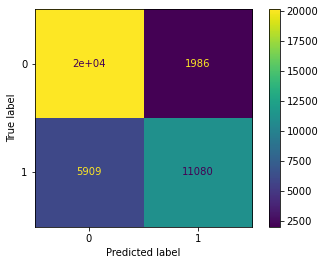

In [127]:
confusion_matrix(Y_test, y_pred)
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(bern2, X_test, Y_test)  
plt.show()  

In [128]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.80
Recall: 0.6521867090470305
Precisión: 0.8480024491045461
Puntuación F1: 0.7373149226418234


In [129]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84     22139
           1       0.85      0.65      0.74     16989

    accuracy                           0.80     39128
   macro avg       0.81      0.78      0.79     39128
weighted avg       0.81      0.80      0.79     39128

